<a href="https://colab.research.google.com/github/Mostafiz-Badhon/Chat-Bridge/blob/main/COMP1618.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 2 - Regression**

In [1]:
#importing Libraries
import numpy as np # A useful package for dealing with mathematical processes, it can deal with multi-dimensional arrays such as matrices intuitively.
import pandas as pd #a common package for viewing tabular data
import matplotlib.pyplot as plt #We will be using Matplotlib for our graphs
import seaborn as sns
from sklearn.impute import SimpleImputer
import sklearn.linear_model
from sklearn.linear_model import LinearRegression #Import Linear Regression
from sklearn.model_selection import GridSearchCV
from sklearn import tree #Import the Decision Tree library for the regression model
from sklearn.neighbors import KNeighborsRegressor #Import the Knn library for the regression model
import graphviz #to visualize decision tree
from sklearn import metrics


from google.colab import files #to load data from computer

In [ ]:
#select file to be uploaded
uploaded = files.upload()
#Loading California Housing Data
housingData = pd.read_csv('housing_coursework_entire_dataset_23-24.csv')
df = pd.DataFrame(data= housingData)

# show the data
display(df)

Saving housing_coursework_entire_dataset_23-24.csv to housing_coursework_entire_dataset_23-24 (1).csv


,No.,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,1,-122.12,37.70,17,2488,617.0,1287,538,2.9922,179900,NEAR BAY
1,2,-122.21,38.10,36,3018,557.0,1445,556,3.8029,129900,NEAR BAY
2,3,-122.22,38.11,43,1939,353.0,968,392,3.1848,112700,NEAR BAY
3,4,-122.20,37.78,52,2300,443.0,1225,423,3.5398,158400,NEAR BAY
4,5,-122.19,37.79,50,954,217.0,546,201,2.6667,172800,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
995,996,-119.30,36.30,14,3023,469.0,1523,492,5.3602,118600,INLAND
996,997,-121.70,38.65,22,1360,282.0,808,229,2.4167,225000,INLAND
997,998,-121.92,38.57,10,1320,246.0,898,228,1.9327,193800,INLAND
998,999,-122.00,38.83,26,272,49.0,194,52,3.4187,98400,INLAND



## **Pre-Processing**

In [ ]:
#statistics about Data
housingData.describe()

,No.,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,991.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,-119.508740,35.604810,27.62500,2736.217000,557.273461,1471.59000,515.909000,3.955882,207767.443000
std,288.819436,1.960951,2.139722,12.27253,2179.854484,426.100791,1123.21073,384.781423,1.940355,113675.832278
min,1.000000,-124.190000,32.560000,2.00000,19.000000,11.000000,34.00000,9.000000,0.536000,14999.000000
25%,250.750000,-121.520000,33.910000,17.75000,1484.500000,301.500000,805.75000,287.750000,2.625000,119900.000000
50%,500.500000,-118.480000,34.255000,27.50000,2214.000000,449.000000,1199.50000,426.500000,3.692600,184350.000000
75%,750.250000,-118.030000,37.700000,36.00000,3260.000000,668.500000,1803.75000,626.000000,4.856800,261950.000000
max,1000.000000,-115.410000,41.780000,52.00000,27700.000000,4386.000000,15037.00000,4072.000000,15.000100,500001.000000


***Dropping Columns which are not required***

In [ ]:
#Dropping columns population, household
df_updated = df.copy()
df_updated.drop(["population", "households"], axis = 1, inplace=True)
display(df_updated)

In [ ]:
sns.set(context="paper",font="monospace")
housing_corr_matrix = df_updated.corr()
#set the matplotlib figure
fig, axe = plt.subplots(figsize=(12,8))
#Generate color palettes
cmap = sns.diverging_palette(220,10,center = "light", as_cmap=True)
#draw the heatmap
sns.heatmap(housing_corr_matrix,vmax=1,square =True, cmap=cmap,annot=True );

In [ ]:
#Checking for Null Values
df_updated.isnull().sum()

***Imputing Missing***

In [ ]:
#Statistics for Missing Values in total bedroom
print ("Total_bedrooms column Mode is  "+str(df_updated["total_bedrooms"].mode())+"\n")
print(df_updated["total_bedrooms"].describe())

In [ ]:
total_bedroms = df_updated[df_updated["total_bedrooms"].notnull()]["total_bedrooms"]#["total_bedrooms"]
total_bedroms.hist(figsize=(12,8),bins=50)

In [ ]:
#Imputing Missing Values in total_bedrooms column
print(df_updated.iloc[:,5:6].head())
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(df_updated.iloc[:,5:6])
df_updated.iloc[:,5:6] = imputer.transform(df_updated.iloc[:,5:6])

In [ ]:
#imputing Missing Values in ocean_proximity column
print(df_updated.iloc[:,7:8].head())
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(df_updated.iloc[:,7:8])
df_updated.iloc[:,7:8] = imputer.transform(df_updated.iloc[:,7:8])

In [ ]:
#Checking for Missing Values
df_updated.isnull().sum()

***Label Encoding***

In [ ]:
#ocean_proximity value counts
print(df_updated["ocean_proximity"].value_counts())

<1H OCEAN     456
INLAND        336
NEAR OCEAN    115
NEAR BAY       91
Name: ocean_proximity, dtype: int64


In [ ]:
#Label Encoding for Categorial Feature Ocean Proximity
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

df_updated["ocean_proximity"] = labelEncoder.fit_transform(df_updated["ocean_proximity"])
df_updated["ocean_proximity"].value_counts()

0    456
1    336
3    115
2     91
4      2
Name: ocean_proximity, dtype: int64

### ***Features and Target Selection***

In [ ]:
#Selecting Features and Target
features = df_updated[['longitude',	'latitude',	'housing_median_age',	'total_rooms','median_income',	'total_bedrooms', 'ocean_proximity']]
target = df_updated[['median_house_value']]

# Printing the top rows using 'head'
print(features.head(5))
print(target.head(5))

   longitude  latitude  housing_median_age  total_rooms  median_income  \
0    -122.12     37.70                  17         2488         2.9922   
1    -122.21     38.10                  36         3018         3.8029   
2    -122.22     38.11                  43         1939         3.1848   
3    -122.20     37.78                  52         2300         3.5398   
4    -122.19     37.79                  50          954         2.6667   

   total_bedrooms  ocean_proximity  
0           617.0                2  
1           557.0                2  
2           353.0                2  
3           443.0                2  
4           217.0                2  
   median_house_value
0              179900
1              129900
2              112700
3              158400
4              172800


### ***Splitting Features and Target into Train and Test Data***



In [ ]:
#Preparing Numpy ndarrays
X = np.array(features)
y = np.array(target)

In [ ]:
#Size and Shape of features and target data
print("Features Data shape {} and size {}".format(X.shape,X.size))
print("Target Data shape {} and size {}".format(y.shape,y.size))

Features Data shape (1000, 7) and size 7000
Target Data shape (1000, 1) and size 1000


In [ ]:
#Reshaping the Target Data
y = np.array(target).reshape(1000,)
print("Target Data shape {} and size {}".format(y.shape,y.size))

Target Data shape (1000,) and size 1000


In [ ]:
#Defining Trainig and Testing Data
n_train_points = 800
n_test_points = 200

In [ ]:
#Splitting Data

#splitting features into train/test data
X_train = X[:n_train_points]
X_test = X[n_train_points:n_train_points+n_test_points]

#splitting targets into train/test data
y_train = y[:n_train_points]
y_test = y[n_train_points:n_train_points+n_test_points]

In [ ]:
#Checking Size and Shape of dataset
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

X_train shape (800, 7) and size 5600
X_test shape (200, 7) and size 1400
y_train shape (800,) and size 800
y_test shape (200,) and size 200


In [ ]:
#Standardizing the Data
from sklearn.preprocessing import StandardScaler
independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train)
X_test = independent_scaler.transform(X_test)
print(X_train[0:5,:])
print("test data")
print(X_test[0:5,:])

[[-1.62319912  1.21995571 -0.91641611 -0.1098767  -0.47244351  0.12100931
   1.1476961 ]
 [-1.67131153  1.41552607  0.60860303  0.12459536 -0.0449211  -0.01592746
   1.1476961 ]
 [-1.67665736  1.42041533  1.17045219 -0.35275437 -0.37087595 -0.48151247
   1.1476961 ]
 [-1.66596571  1.25906978  1.89282967 -0.19304793 -0.18366681 -0.27610732
   1.1476961 ]
 [-1.66061988  1.26395904  1.73230134 -0.78851848 -0.64409584 -0.79190247
   1.1476961 ]]
test data
[[-1.17414996  1.43508311  0.76913136  0.02947933  0.12177414 -0.14601739
   0.14204782]
 [-1.17949578  1.43019385 -0.67562361  0.19095537  0.58636924 -0.11406547
   0.14204782]
 [-1.15811249  1.43019385 -0.27430278 -0.63323604 -0.31049441 -0.67094166
   0.14204782]
 [-0.66095092  1.32263015 -0.99668027 -1.16278898  0.25677567 -1.24607609
   0.14204782]
 [-0.67698839  1.29818385 -0.27430278 -1.08359936 -0.83452182 -1.15706719
   0.14204782]]


## **Main Model**
### ***Linear Regression***

In [ ]:
#Main Model
#Regression
from sklearn.linear_model import LinearRegression

#initantiate the linear regression
linearRegModel = LinearRegression(n_jobs=-1)
#fit the model to the training data (learn the coefficients)
linearRegModel.fit(X_train,y_train)
#print the intercept and coefficients
print("Intercept is "+str(linearRegModel.intercept_))
print("coefficients  is "+str(linearRegModel.coef_))

Intercept is 204982.28750000006
coefficients  is [-84889.22113477 -89926.80898012  17524.6318557  -40630.21478591
  75934.70007057  49168.63953997  -3342.07385701]


In [ ]:
#Prediction using Test Data
LR_y_pred = linearRegModel.predict(X_test)

In [ ]:
#Evaluating the Model
# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_test, LR_y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_test, LR_y_pred)))

Mean squared error loss: 4769277059.9985
R2 score: 0.7013


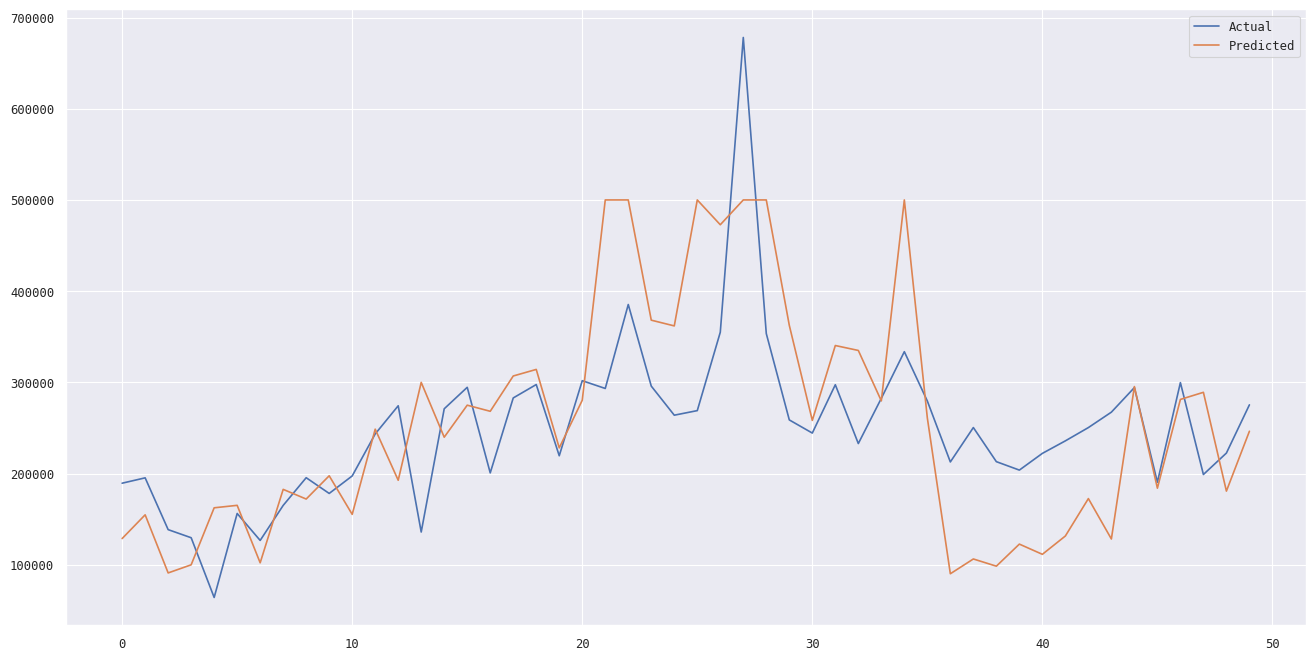

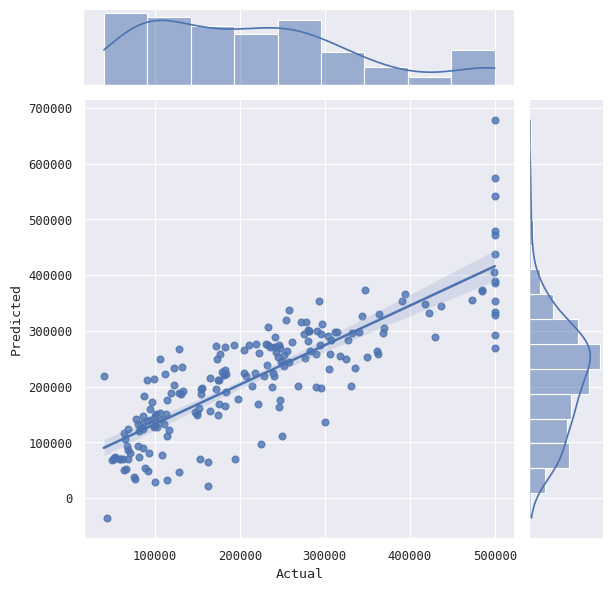

In [ ]:
#Visualizing
test = pd.DataFrame({'Predicted':LR_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

## **Baseline Models**


### ***KNN Regression***

In [ ]:
#KNN Regression Model
# Create Knn regression object
obj_KNN = KNeighborsRegressor()



In [ ]:
# Define the parameter grid to search
KNNparamgrid = {
    'n_neighbors': np.arange(2, 30, 1),
    'weights': ['uniform', 'distance']
}

In [ ]:
# Using GridSearchCV to find the best hyperparameters
KNNgridsearch = GridSearchCV(obj_KNN, KNNparamgrid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [ ]:
# Train the model using the training sets
KNNgridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [ ]:
#the best hyperparameters
KNNBestParams = KNNgridsearch.best_params_
print("Best Hyperparameters:", KNNBestParams)

Best Hyperparameters: {'n_neighbors': 10, 'weights': 'distance'}


In [ ]:
#Predictions using the testing set
KNNBestModel = KNNgridsearch.best_estimator_
KNN_y_pred = KNNBestModel.predict(X_test)

In [ ]:
#Evaluating the Model
# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_test, KNN_y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_test, KNN_y_pred)))

Mean squared error loss: 7118601251.5978
R2 score: 0.5541


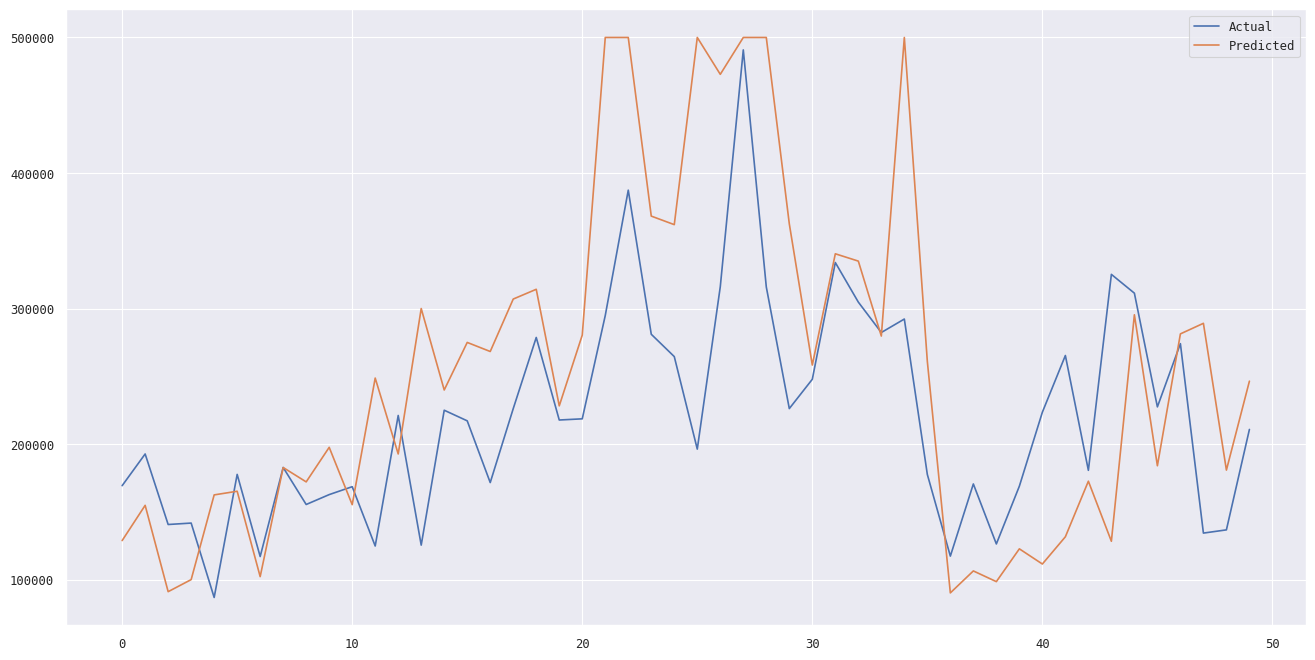

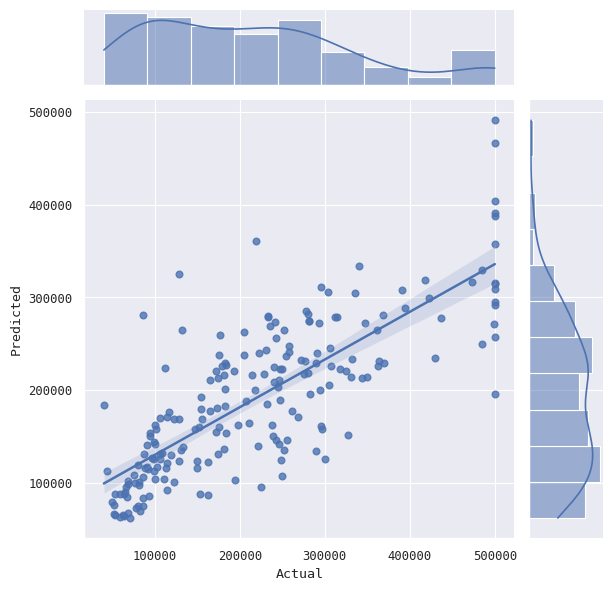

In [ ]:
#Visualisation
test = pd.DataFrame({'Predicted':KNN_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

### ***Decision Tree Regression***

In [ ]:
#Decision Tree
# Create Decision Tree regression object
obj_Tree = tree.DecisionTreeRegressor(max_depth=3, min_samples_split =5, min_samples_leaf=5)

# Train the model using the training sets
obj_Tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=5, min_samples_split=5)

In [ ]:
# Predictions using the testing set
Tree_y_pred = obj_Tree.predict(X_test)

In [ ]:
#Evaluating the Model
# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_test, Tree_y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_test, Tree_y_pred)))

Mean squared error loss: 7128218039.4078
R2 score: 0.5535


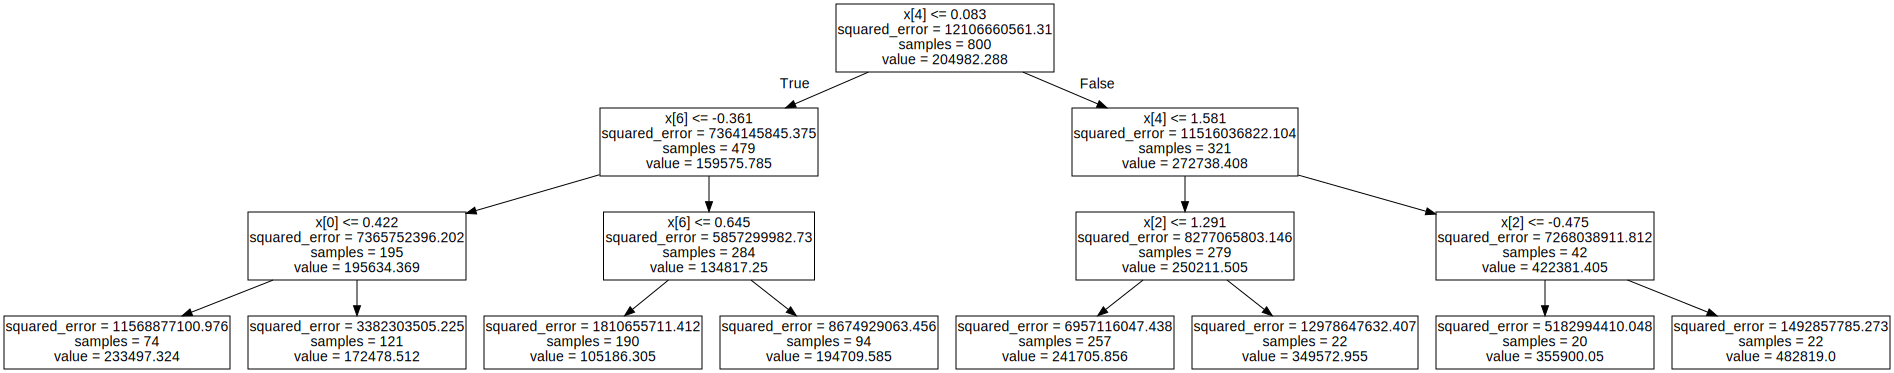

In [ ]:
#Visualizing the Tree
dot_data = tree.export_graphviz(obj_Tree, out_file=None)
graph = graphviz.Source(dot_data)
graph

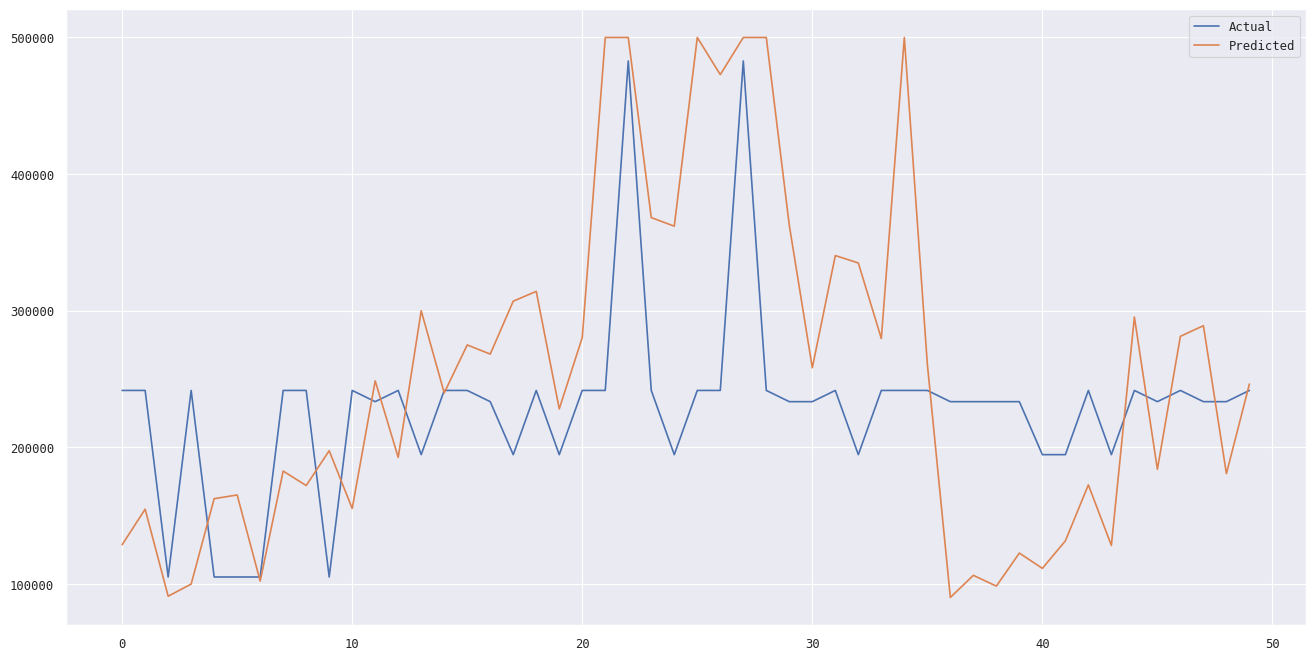

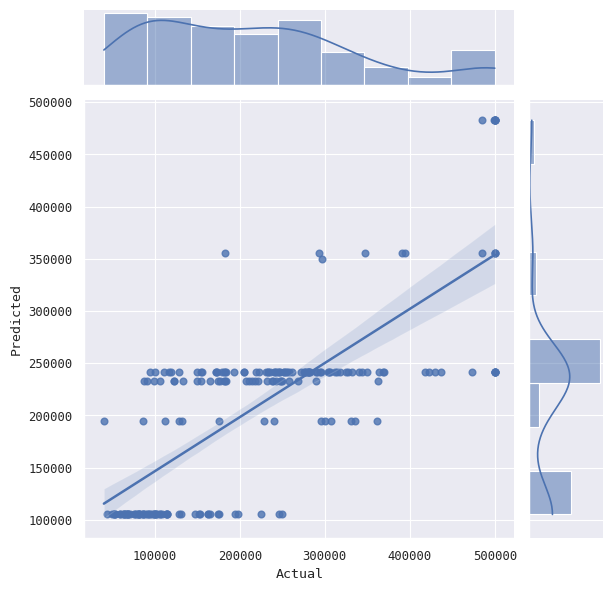

In [ ]:
#Visualisation
test = pd.DataFrame({'Predicted':Tree_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',)



---



---



# **Part 3 - Classification**

In [ ]:
#importing Libraries
import numpy as np # A useful package for dealing with mathematical processes, it can deal with multi-dimensional arrays such as matrices intuitively.
import pandas as pd #a common package for viewing tabular data
import matplotlib.pyplot as plt #We will be using Matplotlib for our graphs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sklearn.linear_model
from sklearn.ensemble import RandomForestClassifier #import random forest classifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier #import Neural Network Classifier
from sklearn.svm import SVC #import svc classifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report, confusion_matrix

from google.colab import files #to load data from computer

In [ ]:
uploaded_classify = files.upload()
#Loading Titatnic Surviving Data
TitanicSurvivalData = pd.read_csv('Titanic_coursework_entire_dataset_23-24.csv')
df_classify = pd.DataFrame(data= TitanicSurvivalData)

# show the data
display(df_classify)

Saving Titanic_coursework_entire_dataset_23-24.csv to Titanic_coursework_entire_dataset_23-24.csv


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survival
0,1,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...
885,886,2.0,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0
886,887,1.0,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
887,888,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,0
888,889,1.0,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1


## **Pre-Processing**

In [ ]:
#statistics about Data
df_classify.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survival
count,890.000000,888.000000,714.000000,890.000000,890.000000,890.000000,890.000000
mean,445.500000,2.306306,29.699118,0.523596,0.382022,32.231521,0.384270
std,257.065167,0.836515,14.526497,1.103224,0.806409,49.714678,0.486696
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.250000,2.000000,20.125000,0.000000,0.000000,7.925000,0.000000
50%,445.500000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,667.750000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,890.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [ ]:
#Data Information
df_classify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  890 non-null    int64  
 1   Pclass       888 non-null    float64
 2   Name         890 non-null    object 
 3   Sex          890 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        890 non-null    int64  
 6   Parch        890 non-null    int64  
 7   Ticket       890 non-null    object 
 8   Fare         890 non-null    float64
 9   Embarked     888 non-null    object 
 10  Survival     890 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 76.6+ KB


***Imputing Missing***

In [ ]:
#Checking Missing Values
df_classify.isnull().sum()

PassengerId      0
Pclass           2
Name             0
Sex              0
Age            176
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Survival         0
dtype: int64

In [ ]:
#copying Dataset to preserve actual dataset and start preprocessing
dfTitanic = df_classify.copy()
display(dfTitanic)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survival
0,1,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...
885,886,2.0,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0
886,887,1.0,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
887,888,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,0
888,889,1.0,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1


In [ ]:
#Again Checking for Missing Values
dfTitanic.isnull().sum()

PassengerId      0
Pclass           2
Name             0
Sex              0
Age            176
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Survival         0
dtype: int64

In [ ]:
#Imputing Missing Values in Embarked Column
#Counting Fare Per Person
#Let us get fare per person
dfTitanic['PeopleInTicket']=dfTitanic['Ticket'].map(dfTitanic['Ticket'].value_counts())
dfTitanic['FarePerPerson']=dfTitanic['Fare']/dfTitanic['PeopleInTicket']

#Printing mean fare for the PORT S and the Pclass & fill it.
print('Mean fare for this category: ', dfTitanic[(dfTitanic.Embarked=='S') & (dfTitanic.Pclass==3)]['FarePerPerson'].mean())

Mean fare for this category:  8.099241285714285


In [ ]:
#Checking the mean fare of person travelling solo
personsolo = dfTitanic.loc[dfTitanic.Fare.isnull(), ['Fare','FarePerPerson']] = round(dfTitanic[(dfTitanic.Embarked=='S') & (dfTitanic.Pclass==3) & (dfTitanic.PeopleInTicket==1)]['Fare'].mean(),1)
print('Mean fare for this category: ', personsolo)

Mean fare for this category:  8.5


In [ ]:
#Tackling Embarked Missing Values
display(dfTitanic[dfTitanic.Embarked.isnull()])

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survival,PeopleInTicket,FarePerPerson
61,62,1.0,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,1,2,40.0
828,829,1.0,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,1,2,40.0


In [ ]:
##Fare is 40 per person (80 for 2 people) for Pclass 1 for 2 adults.
##Grouping Embarked column to check some statistics to determine from where have they embarked
dfTitanic[(dfTitanic.Pclass==1)].groupby('Embarked').agg({'FarePerPerson': 'mean', 'Fare': 'mean', 'PassengerId': 'count'})

,FarePerPerson,Fare,PassengerId
Embarked,,,
C,54.016585,104.718529,85
Q,45.000000,90.000000,2
S,36.748546,70.364862,127


In [ ]:
#Checking data for groups of 2 adults
dfTitanic[(dfTitanic.Pclass==1) & (dfTitanic.PeopleInTicket==2) & (dfTitanic.Age>18)].groupby('Embarked').agg({'FarePerPerson': 'mean', 'Fare': 'mean', 'PassengerId': 'count'})

,FarePerPerson,Fare,PassengerId
Embarked,,,
C,53.373092,106.746183,24
Q,45.000000,90.000000,2
S,37.647045,75.294090,31


In [ ]:
#Checking data for groups of 2 Female adults
dfTitanic[(dfTitanic.Pclass==1) & (dfTitanic.PeopleInTicket==2) & (dfTitanic.Sex=="female") & (dfTitanic.Age>18)].groupby('Embarked').agg({'FarePerPerson': 'mean', 'Fare': 'mean', 'PassengerId': 'count'})

,FarePerPerson,Fare,PassengerId
Embarked,,,
C,54.071225,108.142450,16
Q,45.000000,90.000000,1
S,40.943753,81.887507,15


In [ ]:
#Filling Missing Values of Embarked with S as it is the port with all calculations done above
dfTitanic.Embarked.fillna('S', inplace=True)

In [ ]:
#Imputing Missing Values in Pclass Column
#Defining a group which serves as lookup table
grp = dfTitanic.groupby(['Embarked', 'FarePerPerson'])['Pclass'].mean()
print(grp)

Embarked  FarePerPerson
C         4.012500         3.0
          4.814575         3.0
          5.620850         3.0
          6.437500         3.0
          7.225000         3.0
                          ... 
S         66.825000        1.0
          70.445833        1.0
          81.858300        1.0
          82.433350        1.0
          221.779200       1.0
Name: Pclass, Length: 260, dtype: float64


In [ ]:
#Tackling Pclass Missing Values
display(dfTitanic[dfTitanic.Pclass.isnull()])

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survival,PeopleInTicket,FarePerPerson
508,509,NaN,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,S,0,1,22.5250
652,653,NaN,"Kalvik, Mr. Johannes Halvorsen",male,21.0,0,0,8475,8.4333,S,0,1,8.4333


In [ ]:
#Grouping the Embarked "S" values to check FareperPerson, Fare and No. of Passengers
dfTitanic[(dfTitanic.Embarked=="S")& (dfTitanic.PeopleInTicket==1)& (dfTitanic.Sex=="male") & (dfTitanic.Age>18)].groupby('Pclass').agg({'FarePerPerson': 'mean', 'Fare': 'mean', 'PassengerId': 'count'})

,FarePerPerson,Fare,PassengerId
Pclass,,,
1.0,30.287915,30.287915,40
2.0,13.430189,13.430189,53
3.0,8.189208,8.189208,146


In [ ]:
# Filling Missing Values for 'Pclass' column
for idx in range(len(dfTitanic["Pclass"])):
    fare_per_person = dfTitanic["FarePerPerson"].iloc[idx]

    if fare_per_person > 20.327439:
        dfTitanic["Pclass"].iloc[idx] = '1'
    elif 20.327439 >= fare_per_person > 14.658592:
        dfTitanic["Pclass"].iloc[idx] = '2'
    elif fare_per_person:
        dfTitanic["Pclass"].iloc[idx] = '3'

<ipython-input-66-2714fcaa56e5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTitanic["Pclass"].iloc[idx] = '3'


In [ ]:
#Checking whether the missing values are filled appropriately or not
display(dfTitanic[(dfTitanic["PassengerId"] == 509) | (dfTitanic["PassengerId"] == 653)])

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survival,PeopleInTicket,FarePerPerson
508,509,1,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,S,0,1,22.5250
652,653,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0,0,0,8475,8.4333,S,0,1,8.4333


In [ ]:
#Imputing Missing Values in Age Column
#Sorting Age into Logical Categories
dfTitanic["Age"] = dfTitanic["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager',  'Student', 'Young Adult', 'Adult', 'Senior']
dfTitanic['AgeGroup'] = pd.cut(dfTitanic["Age"], bins, labels=labels)

In [ ]:
# extract a title for each Name in the dataset
dfTitanic['Title'] = dfTitanic.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
# replace various titles with more common names
dfTitanic['Title'] = dfTitanic['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')

dfTitanic['Title'] = dfTitanic['Title'].replace( ['Countess', 'Lady', 'Sir'], 'Royal')
dfTitanic['Title'] = dfTitanic['Title'].replace('Mlle', 'Miss')
dfTitanic['Title'] = dfTitanic['Title'].replace('Ms', 'Miss')
dfTitanic['Title'] = dfTitanic['Title'].replace('Mme', 'Mrs')
#display(dfTitanic['Title'])

# map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
dfTitanic['Title'] = dfTitanic['Title'].map(title_mapping)
dfTitanic['Title'] = dfTitanic['Title'].fillna(0)

In [ ]:
#Filling the Missing Age Values
mr_age = dfTitanic[dfTitanic["Title"] == 1]["AgeGroup"].mode()  # Young Adult
miss_age = dfTitanic[dfTitanic["Title"] == 2]["AgeGroup"].mode()  # Student
mrs_age = dfTitanic[dfTitanic["Title"] == 3]["AgeGroup"].mode()  # Adult
master_age = dfTitanic[dfTitanic["Title"] == 4]["AgeGroup"].mode()  # Baby
royal_age = dfTitanic[dfTitanic["Title"] == 5]["AgeGroup"].mode()  # Adult
rare_age = dfTitanic[dfTitanic["Title"] == 6]["AgeGroup"].mode()  # Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(dfTitanic["AgeGroup"])):
    if dfTitanic["AgeGroup"][x] == "Unknown":
        dfTitanic["AgeGroup"][x] = age_title_mapping[dfTitanic["Title"][x]]

#Assigning Numerical Value to Age Category
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6,  'Senior': 7}
dfTitanic['AgeGroup'] = dfTitanic['AgeGroup'].map(age_mapping)

In [ ]:
#Checking for Null Values
dfTitanic.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Embarked          0
Survival          0
PeopleInTicket    0
FarePerPerson     0
AgeGroup          0
Title             0
dtype: int64

***Label Encoding***

In [ ]:
#Encoding Sex
#Counting Males and Females
dfTitanic["Sex"].value_counts()

male      576
female    314
Name: Sex, dtype: int64

In [ ]:
#Label Encoding for Feature Sex

SexlabelEncoder = LabelEncoder()

dfTitanic["Sex"] = SexlabelEncoder.fit_transform(dfTitanic["Sex"])
dfTitanic["Sex"].value_counts()

1    576
0    314
Name: Sex, dtype: int64

In [ ]:
#Encoding Embarked Column
#Counting Embarked Values
dfTitanic["Embarked"].value_counts()

S    645
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
#Label Encoding for Feature Embarked

EmbarkedlabelEncoder = LabelEncoder()

dfTitanic["Embarked"] = EmbarkedlabelEncoder.fit_transform(dfTitanic["Embarked"])
dfTitanic["Embarked"].value_counts()

2    645
0    168
1     77
Name: Embarked, dtype: int64

### ***Features and Target Selection***

Text(0, 0.5, '')

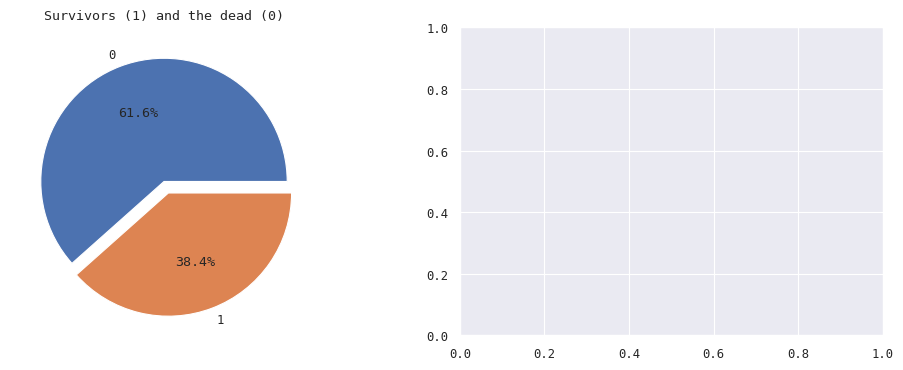

In [ ]:
#Visualizing Survival Rate
f, ax = plt.subplots(1, 2, figsize=(12, 4))
#piechart
dfTitanic['Survival'].value_counts().plot.pie(
    explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False)
ax[0].set_title('Survivors (1) and the dead (0)')
ax[0].set_ylabel('')

Text(0.5, 1.0, 'Survivors by sex (female "0" and Male "1")')

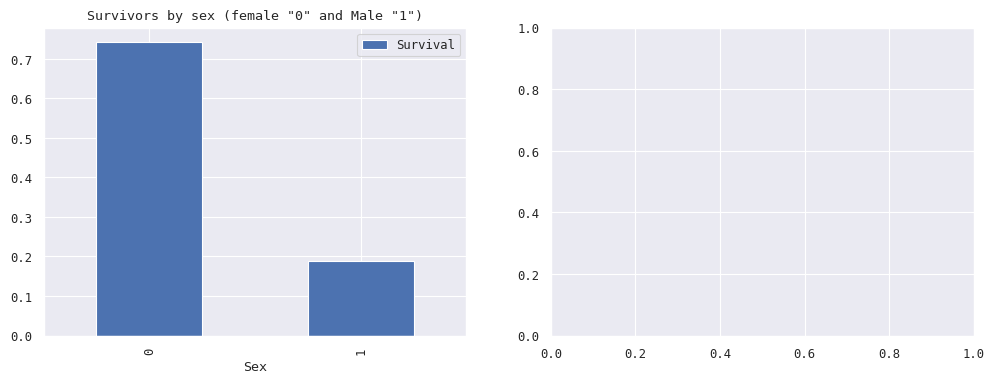

In [ ]:
#Visualizing Survival Rate by Sex
f, ax = plt.subplots(1, 2, figsize=(12, 4))
dfTitanic[['Sex', 'Survival']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survivors by sex (female "0" and Male "1")')

Text(0.5, 1.0, 'Survivors by Class')

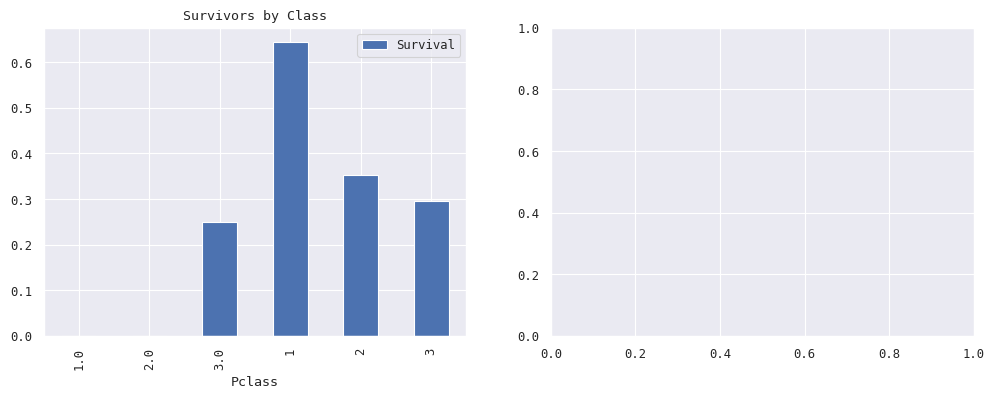

In [ ]:
#Visualizing Survival Rate by Pclass
f, ax = plt.subplots(1, 2, figsize=(12, 4))
dfTitanic[['Pclass', 'Survival']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survivors by Class')

In [ ]:
dfTitanic.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Embarked          0
Survival          0
PeopleInTicket    0
FarePerPerson     0
AgeGroup          0
Title             0
dtype: int64

### ***Features and Target Selection***

**Dropping Columns**

In [ ]:
#Dropping columns PassengerID, Name, Age, SibSp, Parch, Ticket, Fare, PeopleinTicket, FarePerPerson, AgeGroup and Title
dfTitanic.drop(["PassengerId", "Name", "Age", "SibSp", "Parch", "Ticket", "Embarked", "Title", "Fare","PeopleInTicket", "FarePerPerson", "AgeGroup" ], axis = 1, inplace=True)
display(dfTitanic)

,Pclass,Sex,Survival
0,3,1,0
1,1,0,1
2,3,0,1
3,1,0,1
4,3,1,0
...,...,...,...
885,3,1,0
886,1,0,1
887,3,0,0
888,1,1,1


**Selecting Features and Target Column**

In [ ]:
#Selecting Features and Target
features = dfTitanic[['Sex',	'Pclass']]
target = dfTitanic[['Survival']]

#Printing top rows using 'head' so we don't have too much output
print(features.head(5))
print(target.head(5))

### ***Splitting Features and Target into Train and Test Data***

In [ ]:
#Preparing Numpy ndarrays
X = np.array(features)
y = np.array(target)

In [ ]:
#Size and Shape of features and target data
print("Features Data shape {} and size {}".format(X.shape,X.size))
print("Target Data shape {} and size {}".format(y.shape,y.size))

In [ ]:
#Reshaping the Target Data
Y = y.reshape(890,)
print("Target Data shape {} and size {}".format(Y.shape,Y.size))

In [ ]:
#Defining Trainig and Testing Data
n_train_points = 700
n_test_points = 190

In [ ]:
#Splitting Data

#splitting features into train/test data
X_train = X[:n_train_points]
X_test = X[n_train_points:n_train_points+n_test_points]

#splitting targets into train/test data
y_train = Y[:n_train_points]
y_test = Y[n_train_points:n_train_points+n_test_points]

In [ ]:
#Checking Size and Shape of dataset
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

## **Main Model**
### ***Random Forest***

In [ ]:
# Random Forest Object Creation
randomforest = RandomForestClassifier(random_state =42)

In [ ]:
# Define the parameter grid to search
paramatergrid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Instantiatinf GridSearchCV
gridSearch = GridSearchCV(randomforest, paramatergrid, cv=5, scoring='accuracy')

In [ ]:
# Fit the training data along with its output
gridSearch.fit(X_train, y_train)

In [ ]:
# Printing the best hyperparameters
print("Best Hyperparameters:", gridSearch.best_params_)

In [ ]:
#Predictions using Test Data
RFy_pred = gridSearch.predict(X_test)

In [ ]:
#Evaluation of the Model
# Confusion Matrix
rf_cm = confusion_matrix(y_test, RFy_pred)
print("Confusion Matrix:\n", rf_cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, RFy_pred))

# ROC AUC Score
rf_roc_auc = roc_auc_score(y_test, RFy_pred)
print("ROC AUC Score:", rf_roc_auc)

# Accuracy
rf_accuracy = round(accuracy_score(y_test, RFy_pred) * 100, 2)
print("Accuracy:", rf_accuracy)

#Precision
rf_precision = precision_score(y_test, RFy_pred)
print("Precision:", rf_precision)

#Recall
rf_recall = recall_score(y_test, RFy_pred)
print("Recall:", rf_recall)

rf_f1score=f1_score(y_test, RFy_pred)
print("F1-score: ", rf_f1score)

## **Baseline Models**

### ***Neural Network***

In [ ]:
# Neural Network Object Creation
NN = MLPClassifier(hidden_layer_sizes=(50,),
                       activation='relu',
                       alpha=0.0001,
                       learning_rate_init=0.001,
                       random_state=42)


In [ ]:
# Fit the training data along with its output
NN.fit(X_train, y_train)

In [ ]:
#Prediction using Test data
NNy_pred = NN.predict(X_test)

In [ ]:
#Evaluating the Model
# Confusion Matrix
nn_cm = confusion_matrix(y_test, NNy_pred)
print("Confusion Matrix:\n", nn_cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, NNy_pred))

# ROC AUC Score
nn_roc_auc = roc_auc_score(y_test, NNy_pred)
print("ROC AUC Score:", nn_roc_auc)

# Accuracy
nn_accuracy = round(accuracy_score(y_test, NNy_pred) * 100, 2)
print("Accuracy:", nn_accuracy)

#Precision
nn_precision = precision_score(y_test, NNy_pred)
print("Precision:", nn_precision)

#Recall
nn_recall = recall_score(y_test, NNy_pred)
print("Recall:", nn_recall)

#f1-score
nn_f1score=f1_score(y_test, NNy_pred)
print("F1-score", nn_f1score)

### ***Support Vector Classifier***

In [ ]:
# SVC Object Creation
svc = SVC()


In [ ]:
#Parameter grid to search
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__gamma': ['scale', 'auto', 0.1, 1, 10],
    'svc__degree': [2, 3, 4, 5]
}

In [ ]:
#Creatingg pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', svc)
])


In [ ]:
#Finding the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
# Fit the training data along with its output
grid_search.fit(X_train, y_train)

In [ ]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

In [ ]:
#Prediction using Test data
bestSVCmodel = grid_search.best_estimator_
SVCY_pred = bestSVCmodel.predict(X_test)

In [ ]:
#Evaluating the Model
# Confusion Matrix
svc_cm = confusion_matrix(y_test, SVCY_pred)
print("Confusion Matrix:\n", svc_cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, SVCY_pred))

svc_roc_auc = roc_auc_score(y_test, SVCY_pred)
print("ROC AUC Score:", svc_roc_auc)

# Accuracy
svc_accuracy = round(accuracy_score(y_test, SVCY_pred) * 100, 2)
print("Accuracy:", svc_accuracy)

#Precision
svc_precision = precision_score(y_test, SVCY_pred)
print("Precision:", svc_precision)

#Recall
svc_recall = recall_score(y_test, SVCY_pred)
print("Recall:", svc_recall)

#f1-score
svc_f1score=f1_score(y_test, SVCY_pred)
print("F1-score", svc_f1score)

NameError: name 'SVCY_pred' is not defined